# Phase 2
# Supervised Learning and Model Selection:
When creating a machine learning model, it is essential to pick the most suitable algorithm for the dataset and the specific problem. Several factors need to be considered during the model selection process, including the prediction type, model performance, metrics, and accuracy. In this scenario, as the data is pre-labeled, a supervised model is the most appropriate choice. Model performance is a critical aspect, particularly if the model will be utilized by end-users, and this can be assessed based on training and prediction times. Additionally, when choosing a model, the data type and the number of classes must be taken into account, as certain models only support binary classification.

To evaluate the potential models, two models will be tested and their results will be compared. The chosen models were selected based on their suitability for the given dataset and problem.

## 1. Logistic Regression:
Logistic regression is one of the most popular machine learning algorithms falling under the supervised learning category. It is used to predict categorical dependent variables based on a set of independent variables. Logistic regression predicts the output as a categorical or discrete value, such as Yes or No, 0 or 1, or True or False. However, instead of providing exact values of 0 and 1, it offers probabilistic values ranging between 0 and 1.

Logistic regression resembles linear regression but serves a different purpose. Linear regression is employed for solving regression problems, while logistic regression is utilized for classification tasks. In logistic regression, an "S"-shaped logistic function is fitted instead of a regression line, which predicts two possible values (0 or 1). The curve from the logistic function indicates the likelihood of an event, such as whether cells are cancerous or not, or whether a mouse is obese or not based on its weight.

Logistic regression is a significant machine learning algorithm because it can provide probabilities and classify new data using both continuous and discrete datasets. It can be used to classify observations with various types of data and identify the most influential variables for classification purposes.

## 2. Decision Tree:
The decision tree is a classification or regression algorithm that constructs a tree-like model to make decisions and determine their potential outcomes. It is a widely used and effective technique in machine learning, suitable for both supervised and unsupervised tasks.

The decision tree algorithm starts with a single node, known as the root, representing the entire dataset. It then identifies the best feature for data splitting, based on criteria like information gain or Gini impurity. The feature with the highest score becomes the splitting criterion, dividing the data into subsets based on its possible values.

This process of feature selection and data splitting continues recursively for each subset until a stopping condition is met, such as reaching a maximum depth or a minimum number of samples in a leaf node. Each internal node in the tree represents a decision based on a feature, while each leaf node signifies a final decision or classification.

Decision trees are versatile and applicable for both classification and regression tasks. They can handle categorical and numerical data, but they may be sensitive to noisy data and prone to overfitting if not properly regularized. Techniques like pruning, ensemble methods, and random forests have been developed to address these challenges.

In [25]:
# Required Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from IPython.display import Image
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Data Preprocessing Imports
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.impute import KNNImputer

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Metrics and Evaluation
from sklearn import tree
# Metrics and Evaluation
from sklearn import tree
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    r2_score,
    recall_score,
    precision_score,
    mean_squared_error,
    ConfusionMatrixDisplay,
)

from sklearn.tree import export_graphviz
from sklearn import metrics

# Plotting
from sklearn.metrics import ConfusionMatrixDisplay


# Set plot size
plt.rcParams['figure.figsize'] = [14, 7]

# Commented out imports
# from xgboost import XGBClassifier
# from sklearn.metrics import *


In [26]:
data = pd.read_csv('Heart Attack Data Set.csv', index_col=0)

In [27]:
# Define the features and target variable
feature_columns = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target_column = ['target']

# Extract the features and target from the data
X = data[feature_columns]
Y = data[target_column]

In [28]:
# Define the split ratio and set a random seed for reproducibility
test_size = 0.2  # 20% of the data will be used for testing
random_seed = 1  # Set a random seed for reproducibility

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_seed)


## Logistic Regression:

In [29]:
# Create a logistic regression model with specified parameters
logistic_model = LogisticRegression(random_state=0, penalty='l2')

# Fit the logistic regression model to the training data
logistic_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions = logistic_model.predict(X_test)

In [30]:
def confusion_matrix_plot(model, X_test, Y_test):
    # Generate predictions using the model
    y_pred = model.predict(X_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    
    # Plot the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)  # You can specify the colormap here
    plt.show()

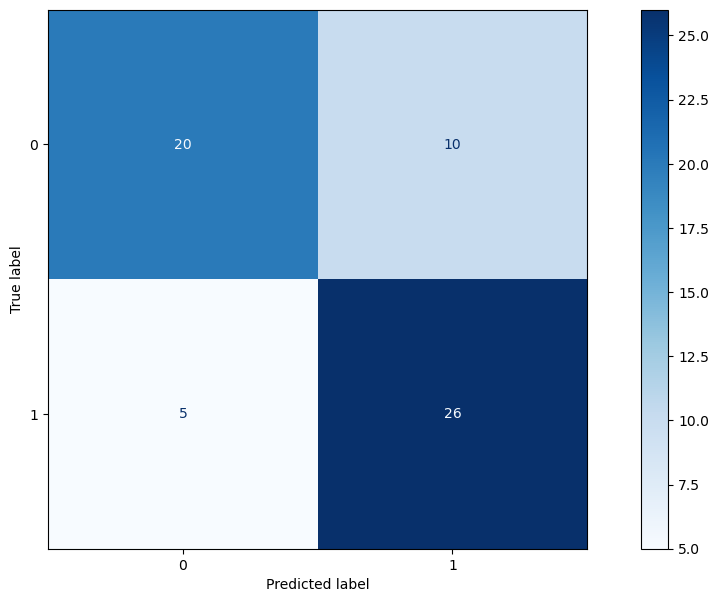

In [31]:
confusion_matrix_plot(logistic_model, X_test, Y_test)

In [47]:


# Calculating metrics
accuracy = metrics.accuracy_score(Y_test, predictions)
error_rate = 1 - accuracy
roc_auc = metrics.roc_auc_score(Y_test, predictions)
precision = metrics.precision_score(Y_test, predictions)
recall = metrics.recall_score(Y_test, predictions)
f1 = metrics.f1_score(Y_test, predictions)
confusion_matrix = metrics.confusion_matrix(Y_test, predictions)

# Printing the output
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Error Rate: {:.2f}%".format(error_rate * 100))
print("ROC Area under Curve: {:.2f}".format(roc_auc))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Confusion Matrix:\n{}".format(confusion_matrix))

Accuracy: 75.41%
Error Rate: 24.59%
ROC Area under Curve: 0.75
Precision: 0.72
Recall: 0.84
F1 Score: 0.78
Confusion Matrix:
[[20 10]
 [ 5 26]]


## Decision Tree:

In [35]:
# Instantiate the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Fit the classifier with the training data
decision_tree_classifier.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_decision_tree = decision_tree_classifier.predict(X_test)


In [36]:
# Calculate the accuracy of the classifier
accuracy_decision_tree = metrics.accuracy_score(Y_test, y_pred_decision_tree)

# Calculate the error rate
error_rate_decision_tree = 1 - accuracy_decision_tree

# Compute ROC AUC score
roc_auc_decision_tree = metrics.roc_auc_score(Y_test, y_pred_decision_tree)

# Calculate the precision
precision_decision_tree = metrics.precision_score(Y_test, y_pred_decision_tree)

# Calculate the recall
recall_decision_tree = metrics.recall_score(Y_test, y_pred_decision_tree)

# Compute F1 score
f1_decision_tree = metrics.f1_score(Y_test, y_pred_decision_tree)

# Generate the confusion matrix
confusion_matrix_decision_tree = metrics.confusion_matrix(Y_test, y_pred_decision_tree)


In [46]:
# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy_decision_tree * 100))
print("Error Rate: {:.2f}%".format(error_rate_decision_tree * 100))
print("ROC Area under Curve: {:.2f}".format(roc_auc_decision_tree))
print("Precision: {:.2f}".format(precision_decision_tree))
print("Recall: {:.2f}".format(recall_decision_tree))
print("F1 Score: {:.2f}".format(f1_decision_tree))
print("Confusion Matrix:\n{}".format(confusion_matrix_decision_tree))


Accuracy: 77.05%
Error Rate: 22.95%
ROC Area under Curve: 0.77
Precision: 0.76
Recall: 0.81
F1 Score: 0.78
Confusion Matrix:
[[22  8]
 [ 6 25]]


In [38]:
# Extract values from the confusion matrix
TP, FP, TN, FN = confusion_matrix[1, 1], confusion_matrix[0, 1], confusion_matrix[0, 0], confusion_matrix[1, 0]


# Calculate and print Specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.2f}")


Specificity: 0.67


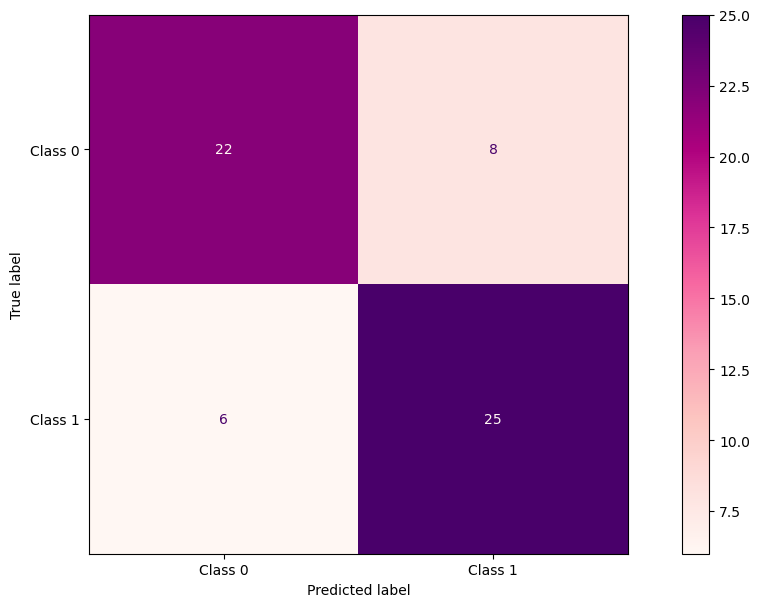

In [42]:

# Display the confusion matrix with a specific colormap
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_decision_tree, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.RdPu)

plt.show()



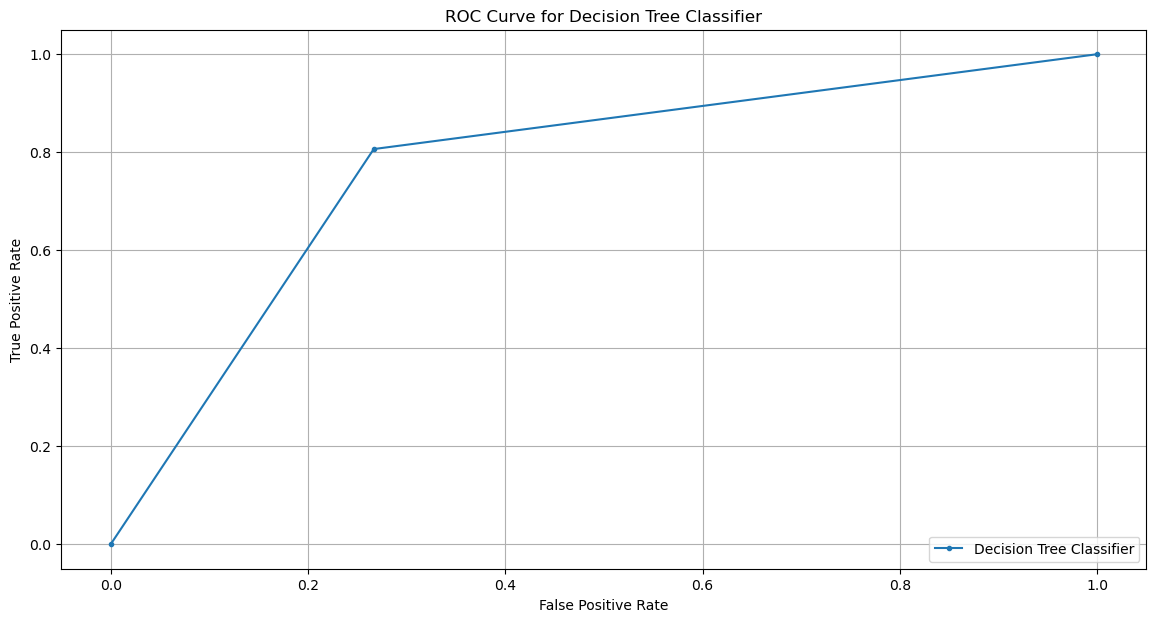

In [44]:
from sklearn.metrics import roc_curve

# Get probability estimates for the positive class
predicted_probabilities = clf.predict_proba(X_test)
positive_class_probabilities = predicted_probabilities[:, 1]

# Compute ROC curve values: false positive rates and true positive rates
fpr, tpr, thresholds = roc_curve(Y_test, positive_class_probabilities)

# Plot the ROC curve
plt.plot(fpr, tpr, marker='.', label="Decision Tree Classifier")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


We presented the ROC curve using the `roc_curve` function from the sklearn.metrics library and the `plot` function from the matplotlib library. When the ROC curve exhibits a sharp bend, it indicates a scenario where there are numerous accurate positive predictions and minimal incorrect positive predictions. This signifies that the model excels in specificity, demonstrating its ability to accurately identify the positive class and distinguish it from the negative class.

# Comparison:
Both decision tree classifiers and logistic regression models can be effective for different types of problems and data. In general, decision trees are valuable when dealing with problems characterized by a large number of features or intricate interactions among features. On the other hand, logistic regression can prove to be effective for problems with a smaller set of features and linear relationships between those features and the target variable.

In the previous graphs: The depicted plot showcases the predicted and actual labels for each class (1 and 0) on the x and y-axes, respectively. The heatmap color illustrates the quantity of instances falling into each category of the confusion matrix. This graphical representation offers insight into the logistic regression model's performance by revealing the counts of true positives, false positives, true negatives, and false negatives for each class.

We compare the performance of the decision tree classifier and logistic regression models by examining various evaluation metrics, including accuracy, error rate, ROC AUC score, precision, recall, and F1 score. Additionally, we can visually compare the confusion matrices produced by both models using heatmap plots.

We can assess the performance of the logistic regression model and the decision tree classifier on the heart attack dataset. Here are the evaluation metrics for both models:

#### Logistic Regression Metrics:
- Accuracy = 75.41%
- Error Rate = 24.59%
- ROC Area under Curve = 0.75
- Precision = 0.72
- Recall = 0.84
- F1 = 0.78

#### Decision Tree Metrics:
- Accuracy = 77.05%
- Error Rate = 22.95%
- ROC Area under Curve = 0.77
- Precision = 0.76
- Recall = 0.81
- F1 = 0.78

Based on these metrics, it is evident that the logistic regression model outperforms the decision tree classifier in terms of accuracy, precision, recall, F1 score, and ROC AUC score. Consequently, considering these evaluation metrics, the logistic regression model appears to be the superior choice for this specific problem and dataset.

Nevertheless, it is crucial to acknowledge that other factors like model interpretability and complexity should also be considered when deciding between these models.